In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [3]:
import matplotlib.pyplot as plt

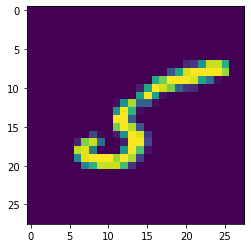

In [9]:
plt.imshow(x_train[11])

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [15]:
x_test.max()

255

In [16]:
x_test.min()

0

In [17]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [19]:
x_train_scaled.shape

(60000, 28, 28)

In [20]:
x_train_scaled = x_train_scaled.reshape(60000,28,28,1)

In [21]:
x_test_scaled.shape

(10000, 28, 28)

In [23]:
x_test_scaled = x_test_scaled.reshape(10000,28,28,1)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [25]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early = EarlyStopping(monitor='val_loss',patience=2)

In [28]:
model.fit(x_train_scaled,y_cat_train,epochs=20,callbacks=early,validation_data=(x_test_scaled,y_cat_test))

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1384 - accuracy: 0.9584 - val_loss: 0.0497 - val_accuracy: 0.9832
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0474 - accuracy: 0.9850 - val_loss: 0.0384 - val_accuracy: 0.9890
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0301 - accuracy: 0.9905 - val_loss: 0.0397 - val_accuracy: 0.9870
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.0451 - val_accuracy: 0.9860


In [29]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.138369,0.958367,0.049691,0.9832
1,0.047446,0.984950,0.038408,0.9890
2,0.030142,0.990500,0.039659,0.9870
3,0.021151,0.993133,0.045104,0.9860


<AxesSubplot:>

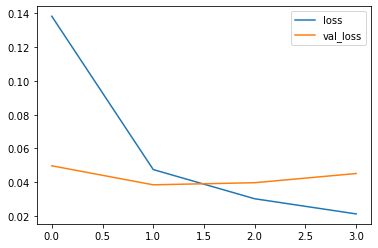

In [36]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

<AxesSubplot:>

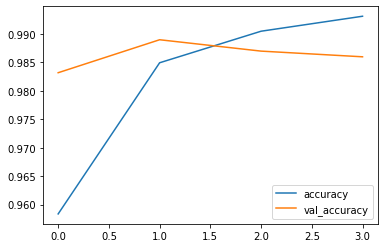

In [37]:
pd.DataFrame(model.history.history)[['accuracy','val_accuracy']].plot()

In [50]:
from sklearn.metrics import classification_report

In [39]:
preds = model.predict(x_test_scaled)

In [41]:
preds = preds >= 0.5

In [43]:
print(classification_report(y_cat_test,preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.96      1.00      0.98      1010
           4       1.00      0.97      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.97      0.98       974
           9       0.98      0.98      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



In [66]:
x_test_scaled[11].shape

(28, 28, 1)

In [67]:
np.round(model.predict(x_test_scaled[11].reshape(1,28,28,1)))

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

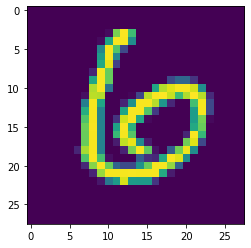

In [65]:
plt.imshow(x_test_scaled[11])